# Proyecto 1 | Inteligencia Artificial
## Integrantes:
- **César Jiménez Salazar** - 2021052709
- **Maynor Martínez Hernández** - 2021052792
- **Fernanda Murillo Mena** - 2021077803

## Descripción
Este notebook corresponde al análisis de pruebas realizadas para el modelo de Regresión Logística.

## Pima Indians Diabetes Database
A pesar de que esto ya fue realizado en el notebook que contiene en análisis y preprocesamiento de los dos *dataset*, es necesario volver a hacerlo aquí para hacer uso de estos. No se explicará a detalle lo que se hace por este mismo motivo.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Load dataset
df_diabetes = pd.read_csv('diabetes.csv')

In [71]:
# Check for missing values for 0 in columns except for the 'Pregnancies' column and 'Outcome' column and replace them with the mean of the respective column
df_diabetes['Glucose'] = df_diabetes['Glucose'].replace(0, np.nan)
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0, np.nan)
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0, np.nan)
df_diabetes['Insulin'] = df_diabetes['Insulin'].replace(0, np.nan)
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0, np.nan)
df_diabetes['DiabetesPedigreeFunction'] = df_diabetes['DiabetesPedigreeFunction'].replace(0, np.nan)
df_diabetes['Age'] = df_diabetes['Age'].replace(0, np.nan)
df_diabetes.fillna(df_diabetes.mean(), inplace=True)

In [72]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
random_seed = 20

# Split the dataframe into training and testing sets
train_df, test_df = train_test_split(df_diabetes, test_size=0.2, random_state=random_seed)

# Print the shapes of the training and testing sets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (614, 9)
Testing set shape: (154, 9)


## Implementación del modelo Regresión Logistica
### Dataset _Pima Indians Diabetes Database_


Primero se ejecutará el modelo con el *dataset* sin modificaciones. Luego, se normalizará el *dataset* y se ejecuta el nuevo modelo normalizado. Por último, se estandariza el *dataset* y se vuelve a ejecutar esta vez estandarizado. Estas 3 pruebas distintas permitirán ver el comportamiento del modelo con diferentes modificaciones al dataset.

In [73]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.xticks([0.5, 1.5], ['Non-diabetic', 'Diabetic'])
    plt.yticks([0.5, 1.5], ['Non-diabetic', 'Diabetic'])
    plt.show()

In [74]:
def print_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

**Dataset Original** <br>
Aquí se realiza la prueba con el dataset original, los resultados no son los más óptimos.

Dataset Original:
Accuracy: 0.76
Precision: 0.70
Recall: 0.53


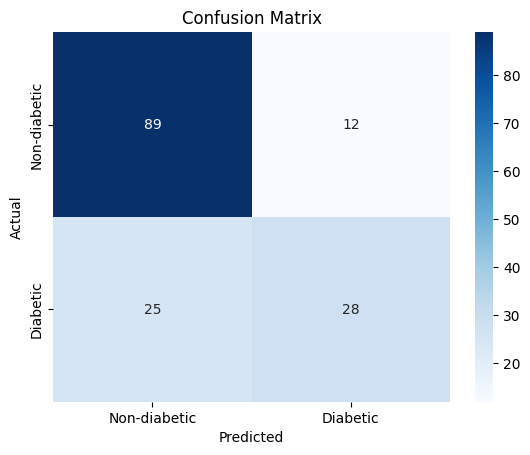

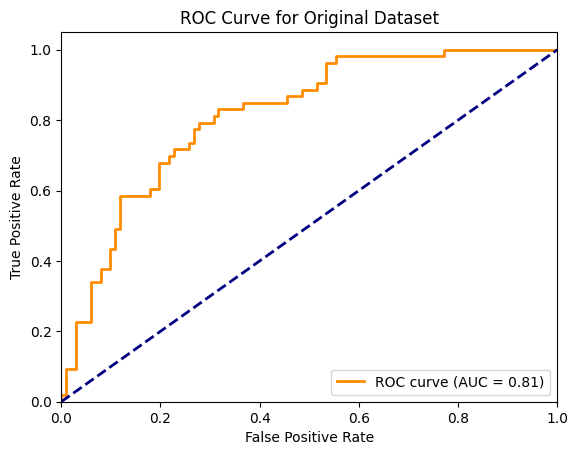

In [75]:
from sklearn.metrics import roc_curve, auc

X_train = train_df.drop('Outcome', axis=1)
y_train = train_df['Outcome']
X_test = test_df.drop('Outcome', axis=1)
y_test = test_df['Outcome']

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

# Train model
log_reg.fit(X_train, y_train)

# Predictions with testing set
y_pred = log_reg.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Dataset Original:")
print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)


y_scores_orig = log_reg.predict_proba(X_test)[:, 1]
fpr_orig, tpr_orig, thresholds_orig = roc_curve(y_test, y_scores_orig)
roc_auc_orig = auc(fpr_orig, tpr_orig)

# Original
plt.figure()
plt.plot(fpr_orig, tpr_orig, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_orig)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Original Dataset')
plt.legend(loc="lower right")
plt.show()

**Dataset Original normalizado**<br>
Aquí se normaliza el *dataset* original, los resultados empeoran un poco, el AUC mejora.

Dataset Original con Normalización:
Accuracy: 0.74
Precision: 0.69
Recall: 0.45


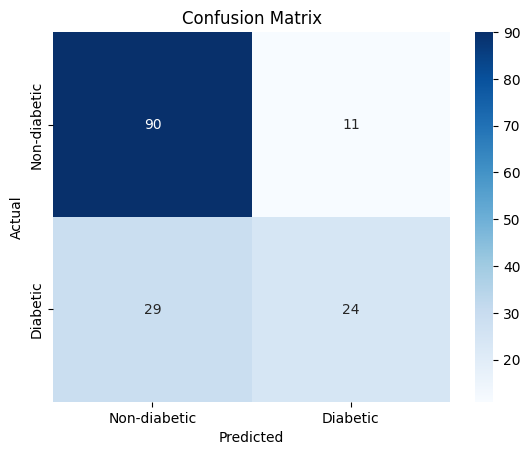

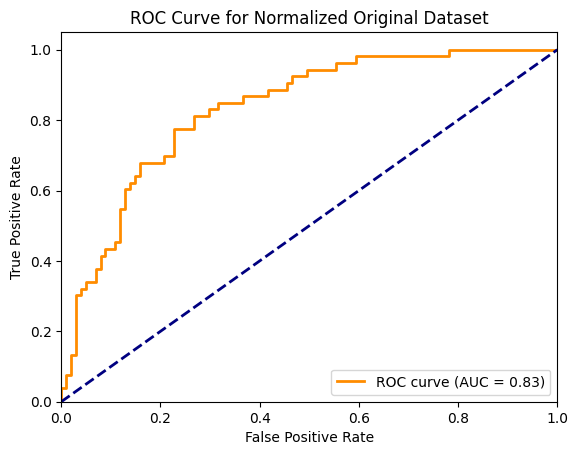

In [76]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

# Train 
log_reg_norm = LogisticRegression(max_iter=1000)
log_reg_norm.fit(X_train_norm, y_train)

# Predictions
y_pred_norm = log_reg_norm.predict(X_test_norm)

accuracy_norm = accuracy_score(y_test, y_pred_norm)
precision_norm = precision_score(y_test, y_pred_norm)
recall_norm = recall_score(y_test, y_pred_norm)

print("Dataset Original con Normalización:")
print_metrics(y_test, y_pred_norm)
plot_confusion_matrix(y_test, y_pred_norm)

y_scores_norm = log_reg_norm.predict_proba(X_test_norm)[:, 1]
fpr_norm, tpr_norm, thresholds_norm = roc_curve(y_test, y_scores_norm)
roc_auc_norm = auc(fpr_norm, tpr_norm)

plt.figure()
plt.plot(fpr_norm, tpr_norm, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_norm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Normalized Original Dataset')
plt.legend(loc="lower right")
plt.show()


**Dataset Original Estandarizado**<br>
Aquí se estandariza el *dataset* original, los resultados son mejores que son la normalización pero siguen siendo peor que con el original sin modificaciones. El AUC baja un poco.


Dataset Original con Estandarización:
Accuracy: 0.75
Precision: 0.69
Recall: 0.51


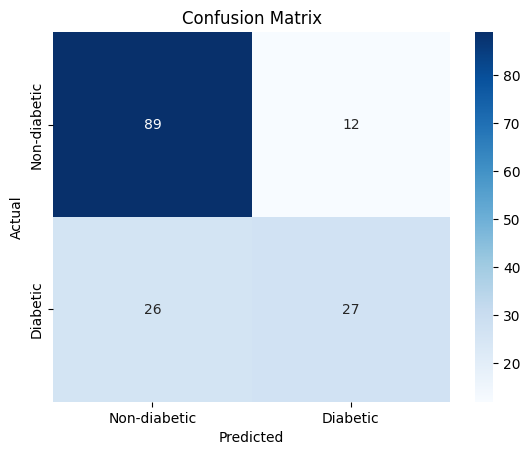

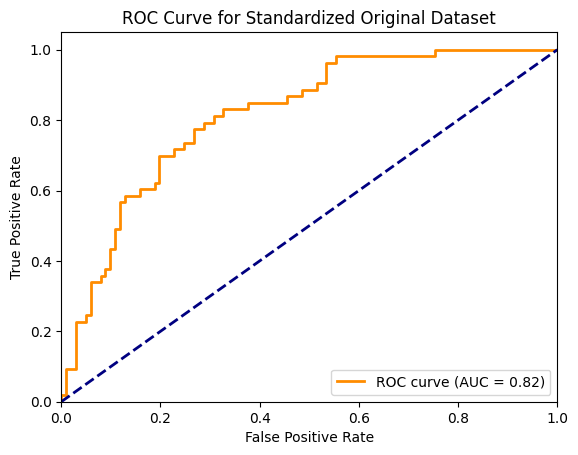

In [77]:
from sklearn.preprocessing import StandardScaler

# Standardize
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Train 
log_reg_std = LogisticRegression(max_iter=1000)
log_reg_std.fit(X_train_std, y_train)

# Predictions
y_pred_std = log_reg_std.predict(X_test_std)

accuracy_std = accuracy_score(y_test, y_pred_std)
precision_std = precision_score(y_test, y_pred_std)
recall_std = recall_score(y_test, y_pred_std)

print("\nDataset Original con Estandarización:")
print_metrics(y_test, y_pred_std)
plot_confusion_matrix(y_test, y_pred_std)

y_scores_std = log_reg_std.predict_proba(X_test_std)[:, 1]
fpr_std, tpr_std, thresholds_std = roc_curve(y_test, y_scores_std)
roc_auc_std = auc(fpr_std, tpr_std)

plt.figure()
plt.plot(fpr_std, tpr_std, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_std)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Standardized Original Dataset')
plt.legend(loc="lower right")
plt.show()


En busca de mejores métricas, se procede a eliminar la columna *Pregnancies* debido a que en el histógrama realizado en la exploración del *dataset* se evidencia que no es relevante para la clasificación. Primero se ejecutará el modelo con el *dataset* sin la columna *Pregnancies*. Luego, se normalizará el *dataset* sin la columna *Pregnancies* y se ejecuta el nuevo modelo normalizado. Por último, se estandariza el *dataset* sin la columna *Pregnancies* y se vuelve a ejecutar esta vez estandarizado. Estas 3 pruebas distintas permitirán ver el comportamiento del modelo con diferentes modificaciones al dataset sin la columna *Pregnancies*. La idea es obtener mejores resultados que con las 3 pruebas anteriores.

**Dataset sin columna pregnancies**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies*, los resultados se mantienen igual a la última prueba realizada. El AUC se mantiene.

Dataset Original sin la columna Pregnancies:
Accuracy: 0.75
Precision: 0.69
Recall: 0.51


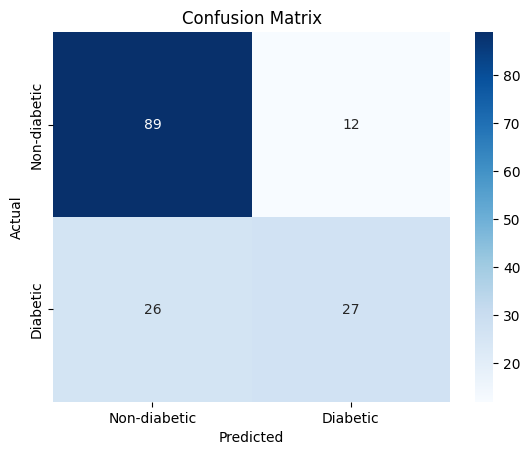

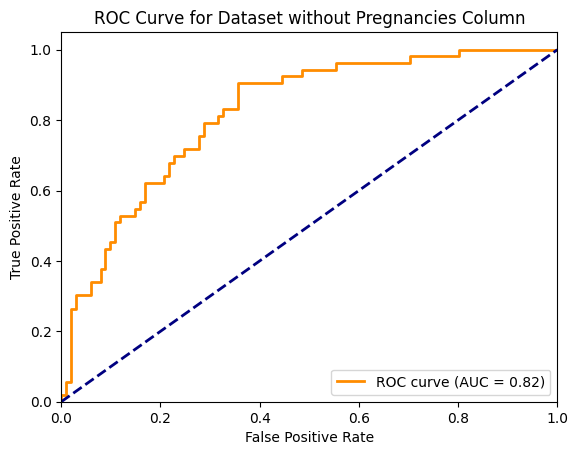

In [78]:
# Delete column 'Pregnancies' 
X_train_no_preg = X_train.drop('Pregnancies', axis=1)
X_test_no_preg = X_test.drop('Pregnancies', axis=1)

# Train without column 'Pregnancies' 
log_reg_no_preg = LogisticRegression(max_iter=1000)
log_reg_no_preg.fit(X_train_no_preg, y_train)
y_pred_no_preg = log_reg_no_preg.predict(X_test_no_preg)


print("Dataset Original sin la columna Pregnancies:")
print_metrics(y_test, y_pred_no_preg)
plot_confusion_matrix(y_test, y_pred_no_preg)

y_scores_no_preg = log_reg_no_preg.predict_proba(X_test_no_preg)[:, 1]
fpr_no_preg, tpr_no_preg, thresholds_no_preg = roc_curve(y_test, y_scores_no_preg)
roc_auc_no_preg = auc(fpr_no_preg, tpr_no_preg)

plt.figure()
plt.plot(fpr_no_preg, tpr_no_preg, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_no_preg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Dataset without Pregnancies Column')
plt.legend(loc="lower right")
plt.show()

**Dataset sin columna pregnancies Normalizado**<br>
Aquí se normaliza el *dataset* original sin la colunna *Pregnancies*, los resultados empeoran un poco en recall pero mejoran en precision. El AUC mejora.


Dataset Original sin la columna Pregnancies Normalizado:
Accuracy: 0.75
Precision: 0.71
Recall: 0.45


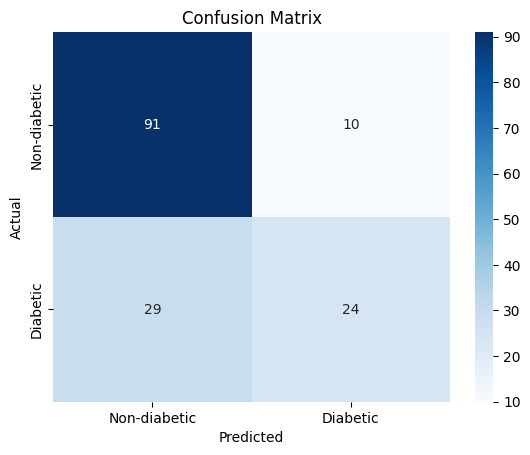

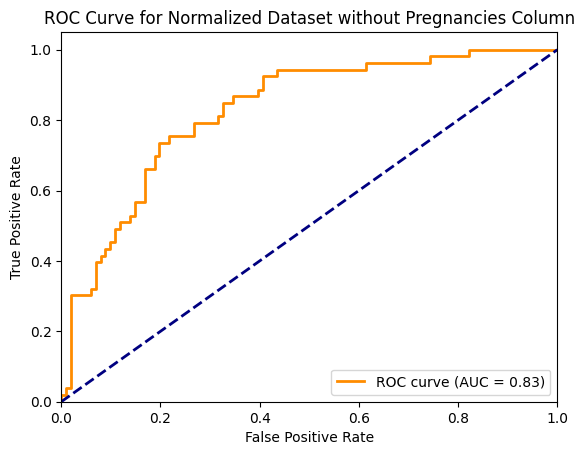

In [79]:
# Normalize without column 'Pregnancies'
scaler_norm_no_preg = MinMaxScaler()
X_train_no_preg_norm = scaler_norm_no_preg.fit_transform(X_train_no_preg)
X_test_no_preg_norm = scaler_norm_no_preg.transform(X_test_no_preg)

# Train dataset normalized without column 'Pregnancies'
log_reg_no_preg_norm = LogisticRegression(max_iter=1000)
log_reg_no_preg_norm.fit(X_train_no_preg_norm, y_train)
y_pred_no_preg_norm = log_reg_no_preg_norm.predict(X_test_no_preg_norm)

print("\nDataset Original sin la columna Pregnancies Normalizado:")
print_metrics(y_test, y_pred_no_preg_norm)
plot_confusion_matrix(y_test, y_pred_no_preg_norm)

y_scores_no_preg_norm = log_reg_no_preg_norm.predict_proba(X_test_no_preg_norm)[:, 1]
fpr_no_preg_norm, tpr_no_preg_norm, thresholds_no_preg_norm = roc_curve(y_test, y_scores_no_preg_norm)
roc_auc_no_preg_norm = auc(fpr_no_preg_norm, tpr_no_preg_norm)

plt.figure()
plt.plot(fpr_no_preg_norm, tpr_no_preg_norm, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_no_preg_norm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Normalized Dataset without Pregnancies Column')
plt.legend(loc="lower right")
plt.show()

**Dataset sin columna pregnancies Estandarizado**<br>
Aquí se estandariza el *dataset* original sin la colunna *Pregnancies*, los resultados mejoran en todas las métricas. El AUC baja.


Dataset Original sin la columna Pregnancies Estandarizado:
Accuracy: 0.77
Precision: 0.72
Recall: 0.53


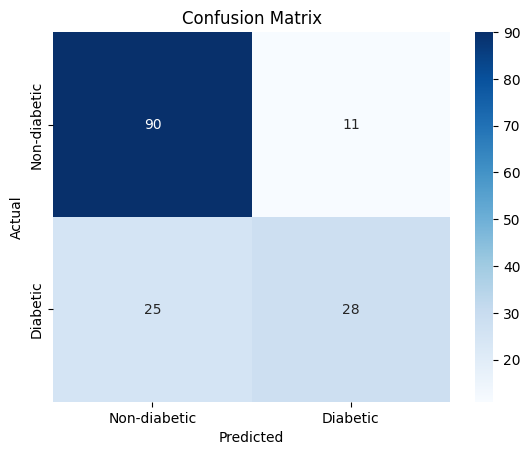

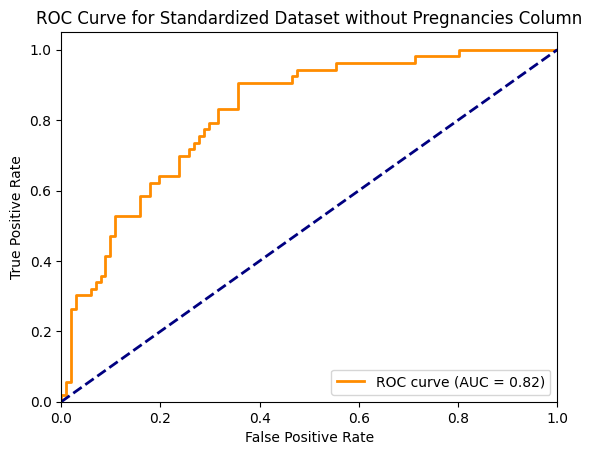

In [80]:
# Standardize without column 'Pregnancies'
scaler_std_no_preg = StandardScaler()
X_train_no_preg_std = scaler_std_no_preg.fit_transform(X_train_no_preg)
X_test_no_preg_std = scaler_std_no_preg.transform(X_test_no_preg)

# Train Standardized without column 'Pregnancies'
log_reg_no_preg_std = LogisticRegression(max_iter=1000)
log_reg_no_preg_std.fit(X_train_no_preg_std, y_train)
y_pred_no_preg_std = log_reg_no_preg_std.predict(X_test_no_preg_std)

print("\nDataset Original sin la columna Pregnancies Estandarizado:")
print_metrics(y_test, y_pred_no_preg_std)
plot_confusion_matrix(y_test, y_pred_no_preg_std)


y_scores_no_preg_std = log_reg_no_preg_std.predict_proba(X_test_no_preg_std)[:, 1]
fpr_no_preg_std, tpr_no_preg_std, thresholds_no_preg_std = roc_curve(y_test, y_scores_no_preg_std)
roc_auc_no_preg_std = auc(fpr_no_preg_std, tpr_no_preg_std)

plt.figure()
plt.plot(fpr_no_preg_std, tpr_no_preg_std, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_no_preg_std)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Standardized Dataset without Pregnancies Column')
plt.legend(loc="lower right")
plt.show()


Continuando en la búsqueda de mejores métricas, se procede a mantener la eliminación de la columna *Pregnancies* y además quitar los *outliers*. Primero se ejecutará el modelo con el *dataset* sin la columna *Pregnancies* y sin *outliers*. Luego, se normalizará el *dataset* sin la columna *Pregnancies* y sin *outliers* y se ejecuta el nuevo modelo normalizado. Por último, se estandariza el *dataset* sin la columna *Pregnancies* y sin *outliers* y se vuelve a ejecutar esta vez estandarizado. Estas 3 pruebas distintas permitirán ver el comportamiento del modelo con diferentes modificaciones al dataset sin la columna *Pregnancies* y sin *outliers*. La idea es obtener mejores resultados que con las pruebas anteriores.

**Dataset sin columna pregnancies y sin outliers**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies* y sin *outliers*, los resultados mejoran considerablemente en comparación a las pruebas anteriores. El AUC incrementa considerablemente.

Dataset Original sin la columna Pregnancies y sin Outliers:
Accuracy: 0.81
Precision: 0.71
Recall: 0.67


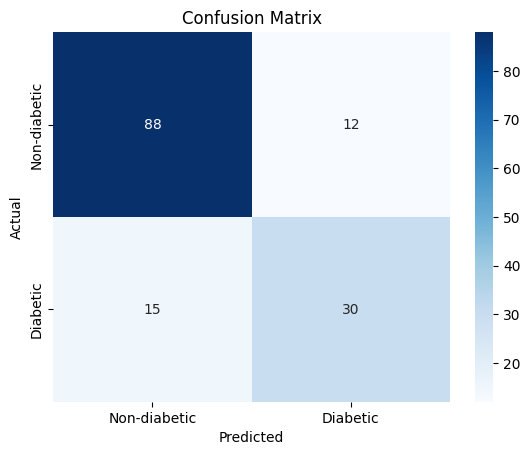

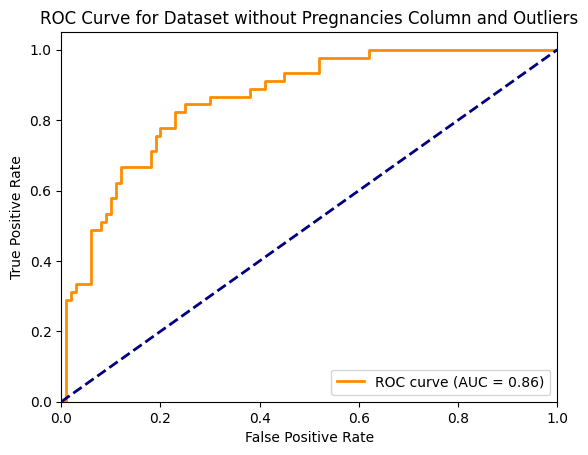

In [81]:
from scipy import stats

# Quitar outliers
z_scores = np.abs(stats.zscore(df_diabetes.drop(['Pregnancies', 'Outcome'], axis=1)))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_no_outliers_only = df_diabetes[~outliers]

X_no_outliers_only = df_no_outliers_only.drop(['Pregnancies', 'Outcome'], axis=1)
y_no_outliers_only = df_no_outliers_only['Outcome']

X_train_no_outliers_only, X_test_no_outliers_only, y_train_no_outliers_only, y_test_no_outliers_only = train_test_split(X_no_outliers_only, y_no_outliers_only, test_size=0.2, random_state=random_seed)

log_reg_no_outliers_only = LogisticRegression(max_iter=1000)
log_reg_no_outliers_only.fit(X_train_no_outliers_only, y_train_no_outliers_only)
y_pred_no_outliers_only = log_reg_no_outliers_only.predict(X_test_no_outliers_only)

print("Dataset Original sin la columna Pregnancies y sin Outliers:")
print_metrics(y_test_no_outliers_only, y_pred_no_outliers_only)
plot_confusion_matrix(y_test_no_outliers_only, y_pred_no_outliers_only)

y_scores_no_outliers = log_reg_no_outliers_only.predict_proba(X_test_no_outliers_only)[:, 1]
fpr_no_outliers, tpr_no_outliers, thresholds_no_outliers = roc_curve(y_test_no_outliers_only, y_scores_no_outliers)
roc_auc_no_outliers = auc(fpr_no_outliers, tpr_no_outliers)

plt.figure()
plt.plot(fpr_no_outliers, tpr_no_outliers, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_no_outliers)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Dataset without Pregnancies Column and Outliers')
plt.legend(loc="lower right")
plt.show()

**Dataset sin columna pregnancies y sin outliers Normalizado**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies* y sin *outliers* normalizado, los resultados mejoran en cuanto a la precision pero empeoran el recall. El AUC se mantiene.

Dataset Original sin la columna Pregnancies y sin Outliers normalizado: 
Accuracy: 0.81
Precision: 0.76
Recall: 0.56


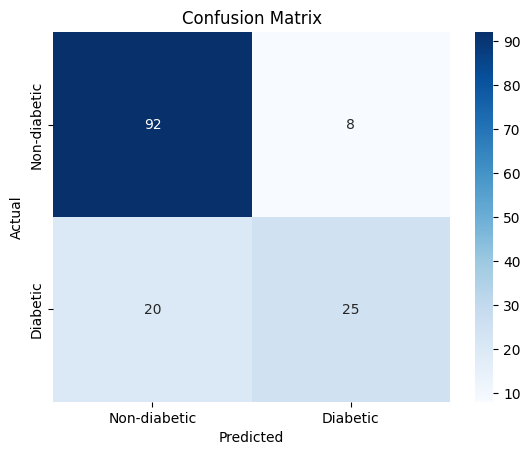

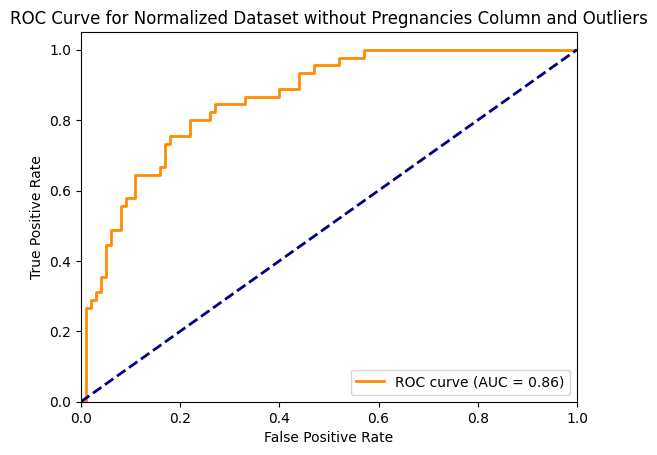

In [110]:
scaler_norm_no_outliers_preg = MinMaxScaler()
X_train_norm_no_outliers_preg = scaler_norm_no_outliers_preg.fit_transform(X_train_no_outliers_only)
X_test_norm_no_outliers_preg = scaler_norm_no_outliers_preg.transform(X_test_no_outliers_only)

log_reg_norm_no_outliers_preg = LogisticRegression(max_iter=1000)
log_reg_norm_no_outliers_preg.fit(X_train_norm_no_outliers_preg, y_train_no_outliers_only)
y_pred_norm_no_outliers_preg = log_reg_norm_no_outliers_preg.predict(X_test_norm_no_outliers_preg)

print("Dataset Original sin la columna Pregnancies y sin Outliers normalizado: ")
print_metrics(y_test_no_outliers_only, y_pred_norm_no_outliers_preg)
plot_confusion_matrix(y_test_no_outliers_only, y_pred_norm_no_outliers_preg)

y_scores_no_outliers_norm = log_reg_norm_no_outliers_preg.predict_proba(X_test_norm_no_outliers_preg)[:, 1]
fpr_no_outliers_norm, tpr_no_outliers_norm, thresholds_no_outliers_norm = roc_curve(y_test_no_outliers_only, y_scores_no_outliers_norm)
roc_auc_no_outliers_norm = auc(fpr_no_outliers_norm, tpr_no_outliers_norm)

plt.figure()
plt.plot(fpr_no_outliers_norm, tpr_no_outliers_norm, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_no_outliers_norm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Normalized Dataset without Pregnancies Column and Outliers')
plt.legend(loc="lower right")
plt.show()

**Dataset sin columna pregnancies y sin outliers Estandarizado**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies* y sin *outliers* estandarizado, los resultados mejoran en cuanto al recall pero empeoran la precision. El AUC se mantiene.


Dataset Original sin la columna Pregnancies y sin Outliers estandarizado:
Accuracy: 0.81
Precision: 0.71
Recall: 0.67


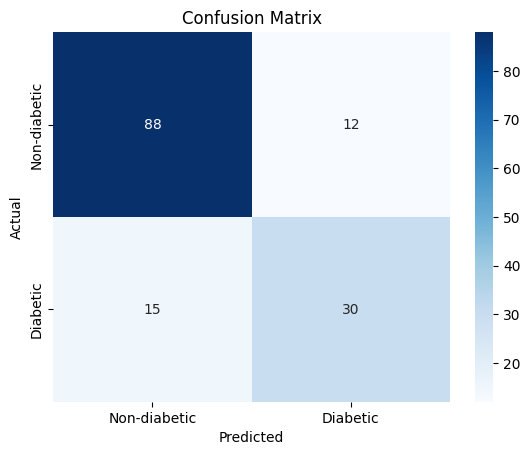

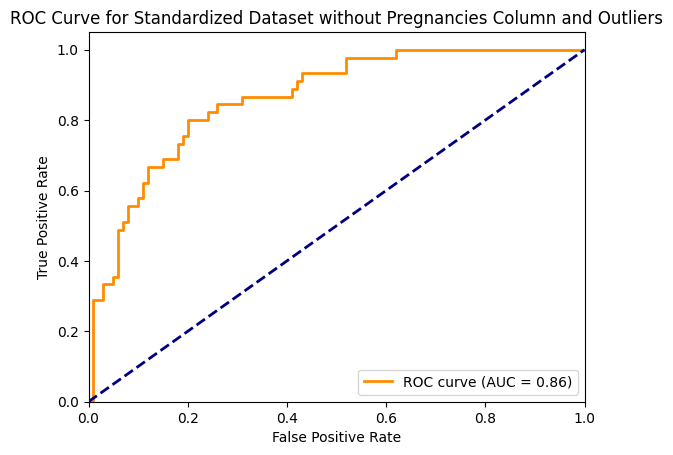

In [82]:
scaler_std_no_outliers_preg = StandardScaler()
X_train_std_no_outliers_preg = scaler_std_no_outliers_preg.fit_transform(X_train_no_outliers_only)
X_test_std_no_outliers_preg = scaler_std_no_outliers_preg.transform(X_test_no_outliers_only)

log_reg_std_no_outliers_preg = LogisticRegression(max_iter=1000)
log_reg_std_no_outliers_preg.fit(X_train_std_no_outliers_preg, y_train_no_outliers_only)
y_pred_std_no_outliers_preg = log_reg_std_no_outliers_preg.predict(X_test_std_no_outliers_preg)

print("\nDataset Original sin la columna Pregnancies y sin Outliers estandarizado:")
print_metrics(y_test_no_outliers_only, y_pred_std_no_outliers_preg)
plot_confusion_matrix(y_test_no_outliers_only, y_pred_std_no_outliers_preg)

y_scores_no_outliers_std = log_reg_std_no_outliers_preg.predict_proba(X_test_std_no_outliers_preg)[:, 1]
fpr_no_outliers_std, tpr_no_outliers_std, thresholds_no_outliers_std = roc_curve(y_test_no_outliers_only, y_scores_no_outliers_std)
roc_auc_no_outliers_std = auc(fpr_no_outliers_std, tpr_no_outliers_std)

plt.figure()
plt.plot(fpr_no_outliers_std, tpr_no_outliers_std, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_no_outliers_std)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Standardized Dataset without Pregnancies Column and Outliers')
plt.legend(loc="lower right")
plt.show()

Continuando en la búsqueda de mejores métricas, se procede a mantener la eliminación de la columna *Pregnancies* y los *outliers*, pero está vez haciendo un sobremuestreo para balancear el dataset. Primero se ejecutará el modelo con el *dataset* sin la columna *Pregnancies* y *outliers* con sobremuestreo. Luego, se normalizará el *dataset* sin la columna *Pregnancies* y *outliers* con sobremuestreo y se ejecuta el nuevo modelo normalizado. Por último, se estandariza el *dataset* sin la columna *Pregnancies* y *outliers* con sobremuestreo y se vuelve a ejecutar esta vez estandarizado. Estas 3 pruebas distintas permitirán ver el comportamiento del modelo con diferentes modificaciones al dataset sin la columna *Pregnancies* y *outliers* y con sobremuestreo. La idea es obtener mejores resultados que con las pruebas anteriores.

**Dataset sin columna pregnancies, sin outliers, con Sobremuestreo**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies* y *outliers* y con sobremuestreo, los resultados son interesantes porque aunque el accuracy vuelve a bajar, el recall y precision suben considerablemente y se convierte en la mejor opción hasta el momento. El AUC se mantiene.

Dataset Original sin la columna Pregnancies, sin Outliers con sobremuestreo:
Accuracy: 0.75
Precision: 0.76
Recall: 0.71


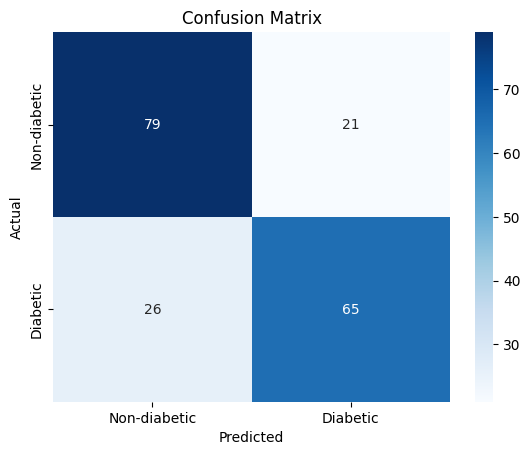

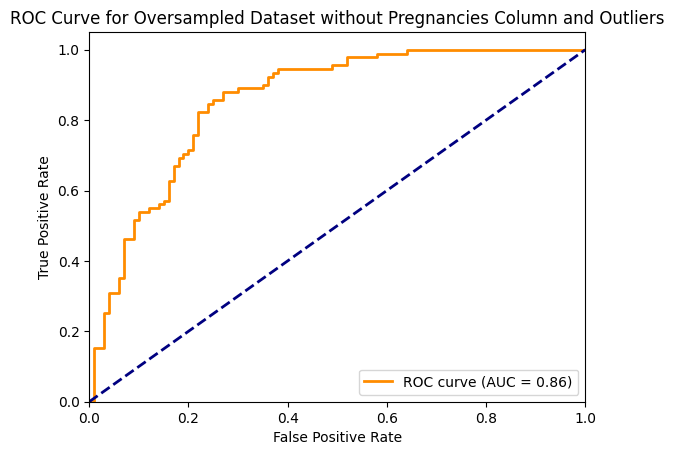

In [83]:
from imblearn.over_sampling import SMOTE

# SMOTE 
smote_no_preg_out = SMOTE(random_state=random_seed)
X_smote_no_preg_out, y_smote_no_preg_out = smote_no_preg_out.fit_resample(X_no_outliers_only, y_no_outliers_only)

X_train_smote_no_preg_out, X_test_smote_no_preg_out, y_train_smote_no_preg_out, y_test_smote_no_preg_out = train_test_split(X_smote_no_preg_out, y_smote_no_preg_out, test_size=0.2, random_state=random_seed)

log_reg_smote_no_preg_out = LogisticRegression(max_iter=1000)
log_reg_smote_no_preg_out.fit(X_train_smote_no_preg_out, y_train_smote_no_preg_out)
y_pred_smote_no_preg_out = log_reg_smote_no_preg_out.predict(X_test_smote_no_preg_out)

print("Dataset Original sin la columna Pregnancies, sin Outliers con sobremuestreo:")
print_metrics(y_test_smote_no_preg_out, y_pred_smote_no_preg_out)
plot_confusion_matrix(y_test_smote_no_preg_out, y_pred_smote_no_preg_out)

y_scores_smote_no_preg_out = log_reg_smote_no_preg_out.predict_proba(X_test_smote_no_preg_out)[:, 1]
fpr_smote_no_preg_out, tpr_smote_no_preg_out, thresholds_smote_no_preg_out = roc_curve(y_test_smote_no_preg_out, y_scores_smote_no_preg_out)
roc_auc_smote_no_preg_out = auc(fpr_smote_no_preg_out, tpr_smote_no_preg_out)

plt.figure()
plt.plot(fpr_smote_no_preg_out, tpr_smote_no_preg_out, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_smote_no_preg_out)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Oversampled Dataset without Pregnancies Column and Outliers')
plt.legend(loc="lower right")
plt.show()


**Dataset sin columna pregnancies, sin outliers, con Sobremuestreo normalizado**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies* y *outliers* y con sobremuestreo normalizado, los resultados mejoran en accuracy y recall pero baja un poco en precision. El AUC baja un poco.


Dataset Original sin la columna Pregnancies, sin Outliers con sobremuestreo normalizado:
Accuracy: 0.76
Precision: 0.75
Recall: 0.74


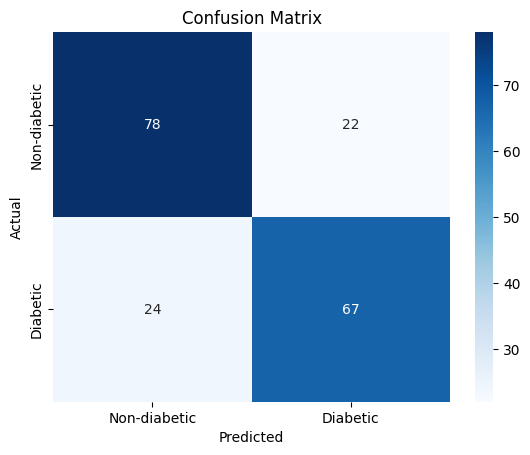

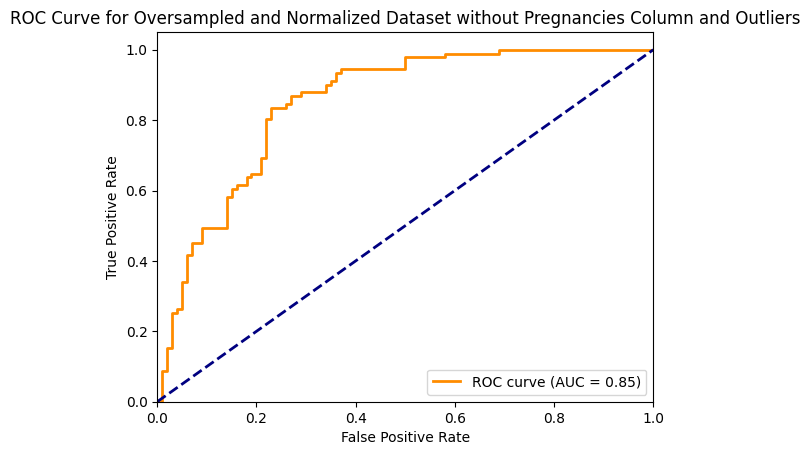

In [84]:
scaler_norm_smote_no_preg_out = MinMaxScaler()
X_train_norm_smote_no_preg_out = scaler_norm_smote_no_preg_out.fit_transform(X_train_smote_no_preg_out)
X_test_norm_smote_no_preg_out = scaler_norm_smote_no_preg_out.transform(X_test_smote_no_preg_out)

log_reg_norm_smote_no_preg_out = LogisticRegression(max_iter=1000)
log_reg_norm_smote_no_preg_out.fit(X_train_norm_smote_no_preg_out, y_train_smote_no_preg_out)
y_pred_norm_smote_no_preg_out = log_reg_norm_smote_no_preg_out.predict(X_test_norm_smote_no_preg_out)

print("\nDataset Original sin la columna Pregnancies, sin Outliers con sobremuestreo normalizado:")
print_metrics(y_test_smote_no_preg_out, y_pred_norm_smote_no_preg_out)
plot_confusion_matrix(y_test_smote_no_preg_out, y_pred_norm_smote_no_preg_out)

y_scores_smote_no_preg_out_norm = log_reg_norm_smote_no_preg_out.predict_proba(X_test_norm_smote_no_preg_out)[:, 1]
fpr_smote_no_preg_out_norm, tpr_smote_no_preg_out_norm, thresholds_smote_no_preg_out_norm = roc_curve(y_test_smote_no_preg_out, y_scores_smote_no_preg_out_norm)
roc_auc_smote_no_preg_out_norm = auc(fpr_smote_no_preg_out_norm, tpr_smote_no_preg_out_norm)

plt.figure()
plt.plot(fpr_smote_no_preg_out_norm, tpr_smote_no_preg_out_norm, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_smote_no_preg_out_norm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Oversampled and Normalized Dataset without Pregnancies Column and Outliers')
plt.legend(loc="lower right")
plt.show()

**Dataset sin columna pregnancies, sin outliers, con Sobremuestreo estandarizado**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies* y *outliers* y con sobremuestreo estandarizado, los resultados mejoran en accuracy y precision pero baja un poco en recall. Se convierte en el nuevo mejor modelo hasta el momento. El AUC baja.


Dataset Original sin la columna Pregnancies, sin Outliers con sobremuestreo estandarizado:
Accuracy: 0.77
Precision: 0.78
Recall: 0.73


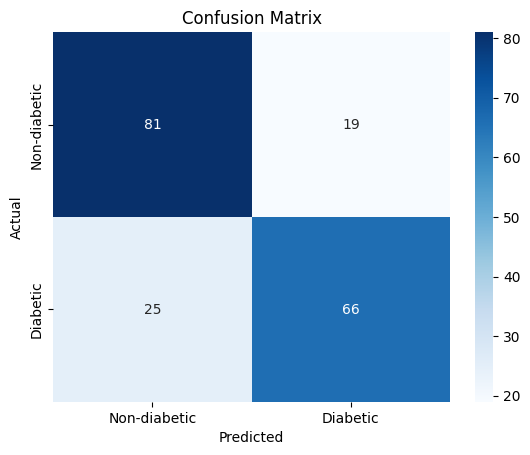

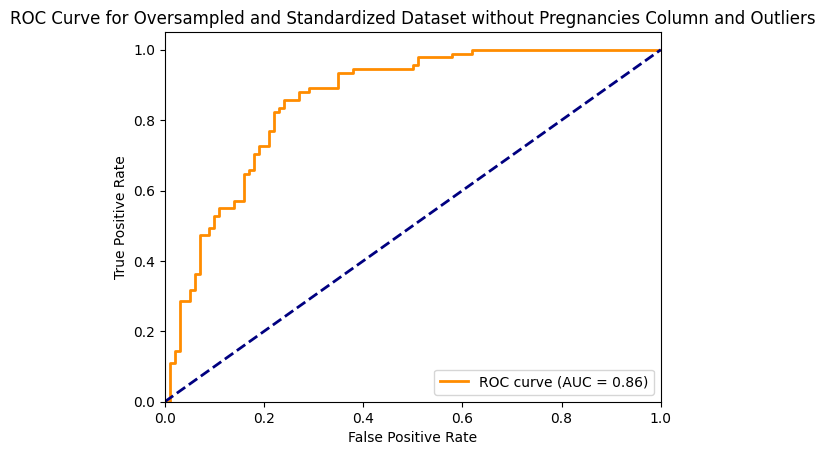

In [85]:
scaler_std_smote_no_preg_out = StandardScaler()
X_train_std_smote_no_preg_out = scaler_std_smote_no_preg_out.fit_transform(X_train_smote_no_preg_out)
X_test_std_smote_no_preg_out = scaler_std_smote_no_preg_out.transform(X_test_smote_no_preg_out)

log_reg_std_smote_no_preg_out = LogisticRegression(max_iter=1000)
log_reg_std_smote_no_preg_out.fit(X_train_std_smote_no_preg_out, y_train_smote_no_preg_out)
y_pred_std_smote_no_preg_out = log_reg_std_smote_no_preg_out.predict(X_test_std_smote_no_preg_out)


print("\nDataset Original sin la columna Pregnancies, sin Outliers con sobremuestreo estandarizado:")
print_metrics(y_test_smote_no_preg_out, y_pred_std_smote_no_preg_out)
plot_confusion_matrix(y_test_smote_no_preg_out, y_pred_std_smote_no_preg_out)

y_scores_smote_no_preg_out_std = log_reg_std_smote_no_preg_out.predict_proba(X_test_std_smote_no_preg_out)[:, 1]
fpr_smote_no_preg_out_std, tpr_smote_no_preg_out_std, thresholds_smote_no_preg_out_std = roc_curve(y_test_smote_no_preg_out, y_scores_smote_no_preg_out_std)
roc_auc_smote_no_preg_out_std = auc(fpr_smote_no_preg_out_std, tpr_smote_no_preg_out_std)

plt.figure()
plt.plot(fpr_smote_no_preg_out_std, tpr_smote_no_preg_out_std, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_smote_no_preg_out_std)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Oversampled and Standardized Dataset without Pregnancies Column and Outliers')
plt.legend(loc="lower right")
plt.show()

Para elegir el mejor modelo, se ha decidido utilizar la métrica AUC calculada en todas las pruebas. Estos resultados se ordenaron de mayor a menor para elegir el menor. Para esto no se redondeó con el fin de obtener el mejor con todos los decimales.

In [86]:
pruebas_auc = [
    ("Original", roc_auc_orig),
    ("Original normalizado", roc_auc_norm),
    ("Original estandarizado", roc_auc_std),
    ("Sin pregnancies", roc_auc_no_preg),
    ("Sin pregnancies normalizado", roc_auc_no_preg_norm),
    ("Sin pregnancies estandarizado", roc_auc_no_preg_std),
    ("Sin pregnancies y sin outliers", roc_auc_no_outliers),
    ("Sin pregnancies y sin outliers normalizado", roc_auc_no_outliers_norm),
    ("Sin preganancies y sin outliers estandarizado", roc_auc_no_outliers_std),
    ("Sin pregnancies, sin outliers y sobremuestreo", roc_auc_smote_no_preg_out),
    ("Sin pregnancies, sin outliers y sobremuestreo normalizado", roc_auc_smote_no_preg_out_norm),
    ("Sin pregnancies, sin outliers y sobremuestreo estandarizado", roc_auc_smote_no_preg_out_std)
]

pruebas_auc.sort(key=lambda x: x[1], reverse=True)

pruebas_auc_array = np.array(pruebas_auc)

for i, prueba in enumerate(pruebas_auc_array):
    print(f"{i+1}. {prueba[0]}: {prueba[1]}")

1. Sin pregnancies y sin outliers normalizado: 0.8617777777777778
2. Sin preganancies y sin outliers estandarizado: 0.8617777777777778
3. Sin pregnancies y sin outliers: 0.8604444444444443
4. Sin pregnancies, sin outliers y sobremuestreo estandarizado: 0.8572527472527472
5. Sin pregnancies, sin outliers y sobremuestreo: 0.8556043956043956
6. Sin pregnancies, sin outliers y sobremuestreo normalizado: 0.8495604395604396
7. Original normalizado: 0.8318699794507752
8. Sin pregnancies normalizado: 0.8270128899682421
9. Sin pregnancies: 0.8206613114141602
10. Sin pregnancies estandarizado: 0.818980011208668
11. Original estandarizado: 0.8150569773958528
12. Original: 0.8143097328600785


Para el modelo de regresión lineal, el mejor modelo fue el primero debido a que obtuvo el mejor resultado con AUC. La decisión final es mantener la eliminación de la columna *Pregnancies* y los *outliers* de manera normalizada.. <br>

Sin embargo, continuando en la búsqueda de mejores métricas para el modelo de regresión logística, se procede a buscar los mejores hiperparámetros para el modelo con el *dataset* ya elegido por el equipo de trabajo. Primero se probó con *scoring='accuracy'*.

**Dataset elegido con mejores hiperparámetros Accuracy**<br>
Aquí se realiza la prueba con el dataset elegido para buscar los mejores hiperparámetros, los resultados son similares al dataset elegido con la diferencia de que baja un poco el recall y sube la precisión. Del mismo modo, se calcular la métrica AUC con el fin de saber cuál de los dos hiperparámetros buscados es el mejor para el caso en cuestión.

Mejores Hiperparámetros optimizando Accuracy: {'C': 1, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.81
Precision: 0.71
Recall: 0.67


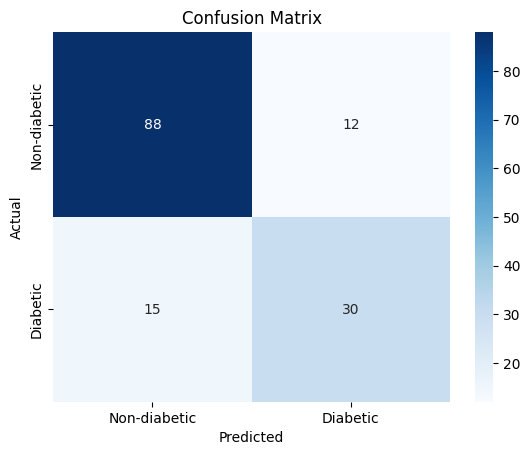

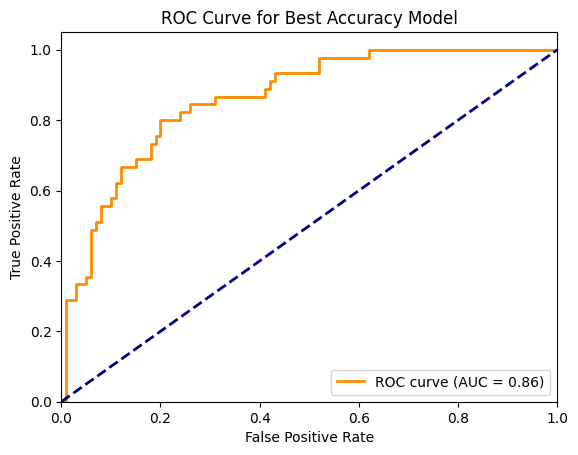

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid_extended = { 
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False]
}

grid_search_acc_std_no_preg_out = GridSearchCV(
    log_reg_norm_no_outliers_preg,
    param_grid_extended,
    cv=5,
    scoring='accuracy'
)

grid_search_acc_std_no_preg_out.fit(X_train_std_no_outliers_preg, y_train_no_outliers_only)

best_params_acc_std_no_preg_out = grid_search_acc_std_no_preg_out.best_params_
best_model_acc_std_no_preg_out = grid_search_acc_std_no_preg_out.best_estimator_

y_pred_best_acc_std_no_preg_out = best_model_acc_std_no_preg_out.predict(X_test_std_no_outliers_preg)

print("Mejores Hiperparámetros optimizando Accuracy:", best_params_acc_std_no_preg_out)
print_metrics(y_test_no_outliers_only, y_pred_best_acc_std_no_preg_out)
plot_confusion_matrix(y_test_no_outliers_only, y_pred_best_acc_std_no_preg_out)

y_scores_acc = best_model_acc_std_no_preg_out.predict_proba(X_test_std_no_outliers_preg)[:, 1]
fpr_acc, tpr_acc, thresholds_acc = roc_curve(y_test_no_outliers_only, y_scores_acc)
roc_auc_acc = auc(fpr_acc, tpr_acc)

plt.figure()
plt.plot(fpr_acc, tpr_acc, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_acc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Accuracy Model')
plt.legend(loc="lower right")
plt.show()

Continuando en la búsqueda de los mejores hiperparámetros para el modelo con el dataset ya elegido por el equipo de trabajo, ahora se probará con *scoring='f1'*.

**Dataset elegido con mejores hiperparámetros F1 Score**<br>
Aquí se realiza la prueba con el dataset elegido para buscar los mejores hiperparámetros con F1 Score, los resultados bajan para accuracy y precision pero suben para recall.

Mejores Hiperparámetros optimizando F1 Score: {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.78
Precision: 0.61
Recall: 0.80


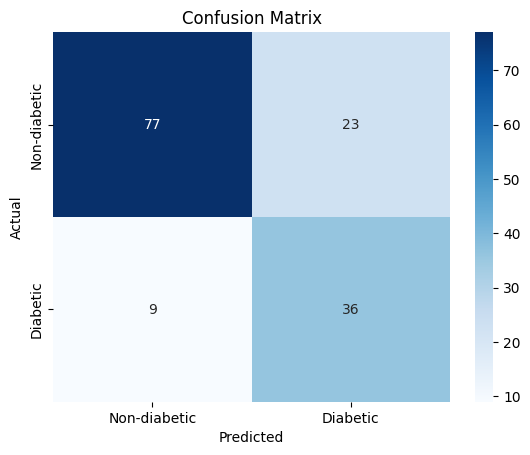

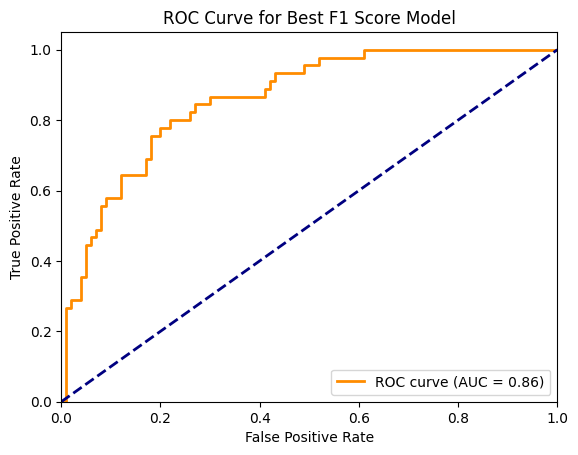

In [88]:
# Optimización de F1 Score
grid_search_f1_std_no_preg_out = GridSearchCV(
    log_reg_norm_no_outliers_preg, 
    param_grid_extended,
    cv=5,
    scoring='f1'
)
grid_search_f1_std_no_preg_out.fit(X_train_std_no_outliers_preg, y_train_no_outliers_only)

best_params_f1_std_no_preg_out = grid_search_f1_std_no_preg_out.best_params_
best_model_f1_std_no_preg_out = grid_search_f1_std_no_preg_out.best_estimator_

y_pred_best_f1_std_no_preg_out = best_model_f1_std_no_preg_out.predict(X_test_std_no_outliers_preg)

print("Mejores Hiperparámetros optimizando F1 Score:", best_params_f1_std_no_preg_out)
print_metrics(y_test_no_outliers_only, y_pred_best_f1_std_no_preg_out)
plot_confusion_matrix(y_test_no_outliers_only, y_pred_best_f1_std_no_preg_out)

y_scores_f1 = best_model_f1_std_no_preg_out.predict_proba(X_test_std_no_outliers_preg)[:, 1]
fpr_f1, tpr_f1, thresholds_f1 = roc_curve(y_test_no_outliers_only, y_scores_f1)
roc_auc_f1 = auc(fpr_f1, tpr_f1)

plt.figure()
plt.plot(fpr_f1, tpr_f1, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_f1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best F1 Score Model')
plt.legend(loc="lower right")
plt.show()

Cómo se puede observar, ambos hiperparámetros calculados dan el mismo AUC (0.86) lo que significa que ambos modelos pueden distinguir correctamente entre las clases. Es necesario saber que uno podría ser preferible cuando es importante maximizar la precisión total (*Accuracy*) y que el otro podría ser mejor cuando es más importante asegurar un buen equilibrio entre la captura de positivos (*Recall*) y la precisión de estas (*Precision*), lo cual es fundamental en situaciones donde los falsos negativos tienen un costo alto como lo es en el caso de diagnósticar a una persona con diabétes.<br>
 Por este motivo, el modelo elegido para el modelo de regresión logística en el *dataset* Pima Indians Diabetes Database es el que se obtuvo con el hiperparámetro F1.

## Heart Failure Prediction Dataset
Nuevamente, a pesar de que esta parte ya fue realizada en el notebook que contiene en análisis y preprocesamiento de los dos *dataset*, es necesario volver a hacerlo aquí para hacer uso de estos. No se explicará a detalle lo que se hace por este mismo motivo.

In [89]:
# Load dataset
df_heart = pd.read_csv('heart.csv')

In [90]:
# Label codification 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_heart['Sex'] = le.fit_transform(df_heart['Sex'])
df_heart['ExerciseAngina'] = le.fit_transform(df_heart['ExerciseAngina'])
df_heart['ChestPainType'] = le.fit_transform(df_heart['ChestPainType'])
df_heart['RestingECG'] = le.fit_transform(df_heart['RestingECG'])
df_heart['ST_Slope'] = le.fit_transform(df_heart['ST_Slope'])

In [91]:
df_heart['Cholesterol'] = df_heart['Cholesterol'].replace(0, np.nan)
df_heart.fillna(df_heart.mean(), inplace=True)

In [92]:
# Set the random seed for reproducibility
random_seed = 20

# Split the dataframe into training and testing sets
heart_train_df, heart_test_df = train_test_split(df_heart, test_size=0.2, random_state=random_seed)

# Print the shapes of the training and testing sets
print("Training set shape:", heart_train_df.shape)
print("Testing set shape:", heart_test_df.shape)

Training set shape: (734, 12)
Testing set shape: (184, 12)


## Implementación del modelo Regresión Logistica
### Dataset _Heart Failure Prediction Dataset_

Primero se ejecutará el modelo con el *dataset* sin modificaciones. Luego, se normalizará el *dataset* y se ejecuta el nuevo modelo normalizado. Por último, se estandariza el *dataset* y se vuelve a ejecutar esta vez estandarizado. Estas 3 pruebas distintas permitirán ver el comportamiento del modelo con diferentes modificaciones al dataset.

In [93]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_Heart(y_test, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.xticks([0.5, 1.5], ['Non-HeartDisease', 'HeartDisease'])
    plt.yticks([0.5, 1.5], ['Non-HeartDisease', 'HeartDisease'])
    plt.show()

**Dataset Original** <br>
Aquí se realiza la prueba con el dataset original, los resultados bastante óptimos.

Dataset Original:
Accuracy: 0.83
Precision: 0.83
Recall: 0.86


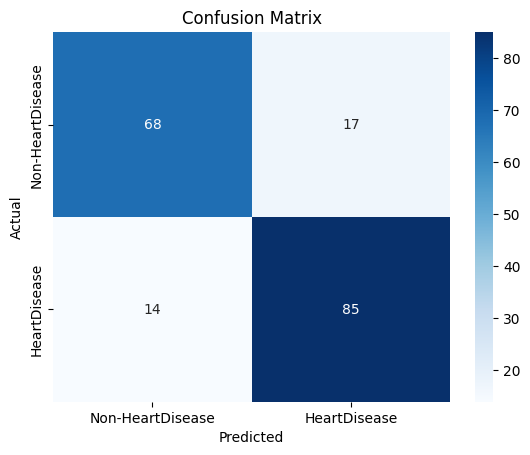

AUC para el modelo con datos originales: 0.92


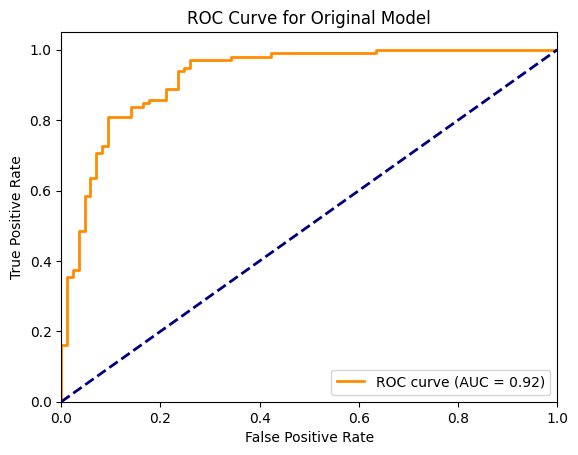

In [94]:
X_heart_train = heart_train_df.drop('HeartDisease', axis=1)
y_heart_train = heart_train_df['HeartDisease']
X_heart_test = heart_test_df.drop('HeartDisease', axis=1)
y_heart_test = heart_test_df['HeartDisease']

# Prueba 1: Modelo con datos originales
log_reg_original = LogisticRegression(max_iter=1000)
log_reg_original.fit(X_heart_train, y_heart_train)
y_heart_pred_original = log_reg_original.predict(X_heart_test)
print("Dataset Original:")
print_metrics(y_heart_test, y_heart_pred_original)
plot_confusion_matrix_Heart(y_heart_test, y_heart_pred_original)

y_scores_orig = log_reg_original.predict_proba(X_heart_test)[:, 1]
fpr_orig, tpr_orig, thresholds_orig = roc_curve(y_heart_test, y_scores_orig)
roc_auc_orig = auc(fpr_orig, tpr_orig)
print(f"AUC para el modelo con datos originales: {roc_auc_orig:.2f}")
plt.figure()
plt.plot(fpr_orig, tpr_orig, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_orig)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Original Model')
plt.legend(loc="lower right")
plt.show()

**Dataset Original normalizado** <br>
Aquí se normaliza el dataset original, en los resultados el *accuracy* y el *precision* mejoran un poco aunque el *recall* se mantiene igual.

Dataset Original con Normalización:


Accuracy: 0.84
Precision: 0.84
Recall: 0.86


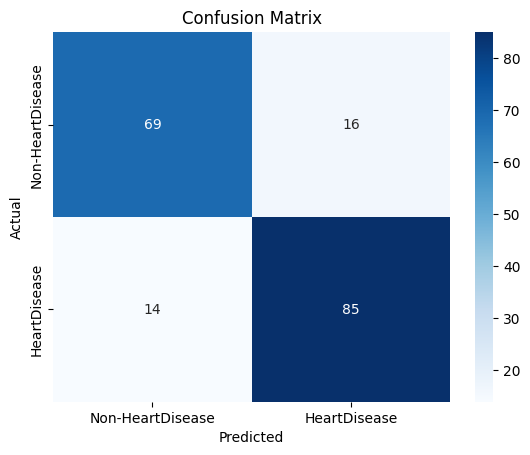

AUC para el modelo con datos normalizados: 0.93


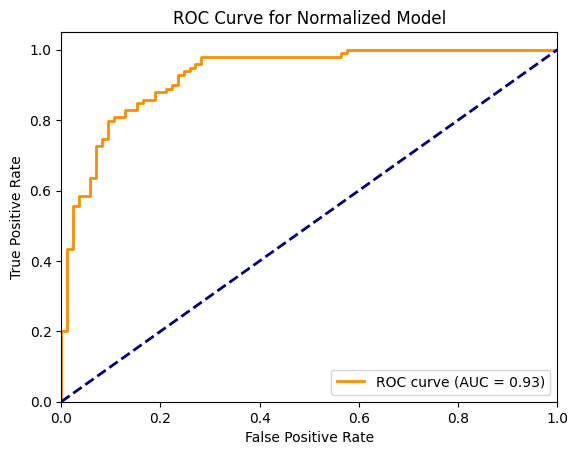

In [95]:
scaler_norm = MinMaxScaler()
X_heart_train_norm = scaler_norm.fit_transform(X_heart_train)
X_heart_test_norm = scaler_norm.transform(X_heart_test)

log_reg_norm = LogisticRegression(max_iter=1000)
log_reg_norm.fit(X_heart_train_norm, y_heart_train)
y_heart_pred_norm = log_reg_norm.predict(X_heart_test_norm)
print("Dataset Original con Normalización:")
print_metrics(y_heart_test, y_heart_pred_norm)
plot_confusion_matrix_Heart(y_heart_test, y_heart_pred_norm)

y_scores_norm = log_reg_norm.predict_proba(X_heart_test_norm)[:, 1]
fpr_norm, tpr_norm, thresholds_norm = roc_curve(y_heart_test, y_scores_norm)
roc_auc_norm = auc(fpr_norm, tpr_norm)
print(f"AUC para el modelo con datos normalizados: {roc_auc_norm:.2f}")
plt.figure()
plt.plot(fpr_norm, tpr_norm, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_norm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Normalized Model')
plt.legend(loc="lower right")
plt.show()


**Dataset Original Estandarizado** <br>
Aquí se estandariza el dataset original, los resultados son peores que con la normalización pero igual al resultado del dataset original.


Dataset Original con Estandarización:
Accuracy: 0.83
Precision: 0.83
Recall: 0.86


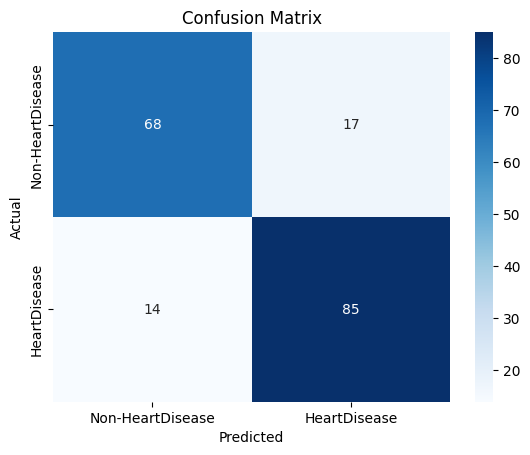

AUC para el modelo con datos estandarizados: 0.92


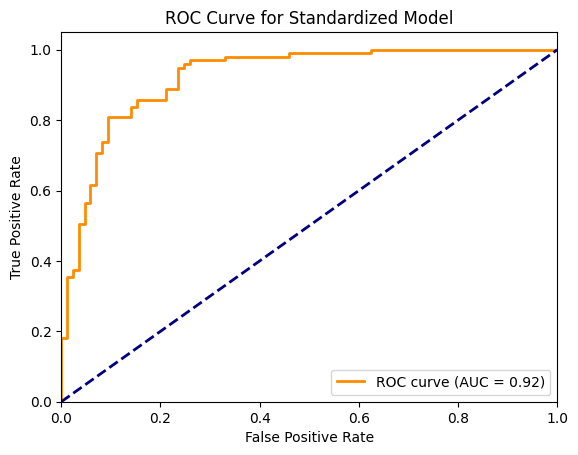

In [96]:
scaler_std = StandardScaler()
X_heart_train_std = scaler_std.fit_transform(X_heart_train)
X_heart_test_std = scaler_std.transform(X_heart_test)

log_reg_std = LogisticRegression(max_iter=1000)
log_reg_std.fit(X_heart_train_std, y_heart_train)
y_heart_pred_std = log_reg_std.predict(X_heart_test_std)
print("\nDataset Original con Estandarización:")
print_metrics(y_heart_test, y_heart_pred_std)
plot_confusion_matrix_Heart(y_heart_test, y_heart_pred_std)

y_scores_std = log_reg_std.predict_proba(X_heart_test_std)[:, 1]
fpr_std, tpr_std, thresholds_std = roc_curve(y_heart_test, y_scores_std)
roc_auc_std = auc(fpr_std, tpr_std)
print(f"AUC para el modelo con datos estandarizados: {roc_auc_std:.2f}")
plt.figure()
plt.plot(fpr_std, tpr_std, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_std)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Standardized Model')
plt.legend(loc="lower right")
plt.show()

En busca de mejores métricas, se procede a eliminar las columnas *Sex*, *ExerciseAngina*, *ST_Slope* y *RestingECG* debido a que en los histógramas realizados en la exploración del *dataset* se evidencia que no tienen mucha información para la clasificación. Primero se ejecutará el modelo con el *dataset* sin las columnas. Luego, se normalizará el *dataset* sin las columnas y se ejecuta el nuevo modelo normalizado. Por último, se estandariza el *dataset* sin la columnas y se vuelve a ejecutar esta vez estandarizado. Estas 3 pruebas distintas permitirán ver el comportamiento del modelo con diferentes modificaciones al dataset sin la columnas. La idea es obtener mejores resultados que con las 3 pruebas anteriores.

**Dataset sin columnas Sex, ExerciseAngina, RestingECG y ST_Slope** <br>
Aquí se realiza la prueba con el dataset sin las columnas, los resultados se mantienen igual a la última prueba realizada para el *recall* pero mejora para las demás métricas.


Dataset sin las columnas mencionadas:
Accuracy: 0.84
Precision: 0.84
Recall: 0.86


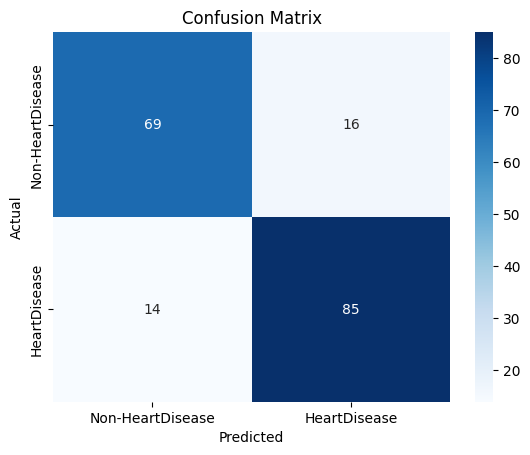

AUC para el modelo sin las columnas mencionadas: 0.89


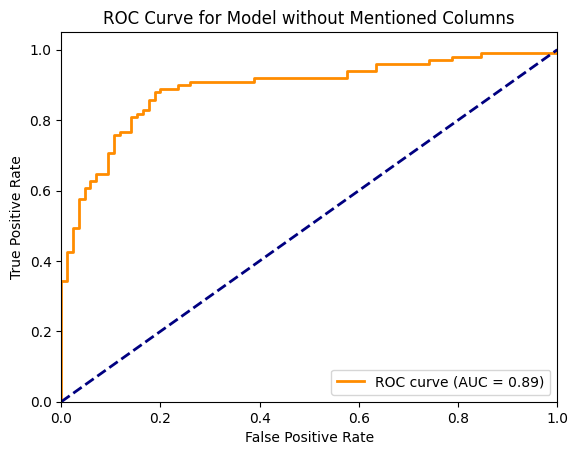

In [97]:
X_heart_train_no_features = X_heart_train.drop(['Sex', 'ExerciseAngina', 'RestingECG', 'ST_Slope'], axis=1)
X_heart_test_no_features = X_heart_test.drop(['Sex', 'ExerciseAngina', 'RestingECG', 'ST_Slope'], axis=1)

log_reg_no_features = LogisticRegression(max_iter=1000)
log_reg_no_features.fit(X_heart_train_no_features, y_heart_train)
y_heart_pred_no_features = log_reg_no_features.predict(X_heart_test_no_features)
print("\nDataset sin las columnas mencionadas:")
print_metrics(y_heart_test, y_heart_pred_no_features)
plot_confusion_matrix_Heart(y_heart_test, y_heart_pred_no_features)

y_scores_no_features = log_reg_no_features.predict_proba(X_heart_test_no_features)[:, 1]
fpr_no_features, tpr_no_features, thresholds_no_features = roc_curve(y_heart_test, y_scores_no_features)
roc_auc_no_features = auc(fpr_no_features, tpr_no_features)
print(f"AUC para el modelo sin las columnas mencionadas: {roc_auc_no_features:.2f}")
plt.figure()
plt.plot(fpr_no_features, tpr_no_features, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_no_features)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model without Mentioned Columns')
plt.legend(loc="lower right")
plt.show()

**Dataset sin columnas Normalizado**<br>
Aquí se normaliza el dataset original sin las columnas, los resultados empeoran para todas las métricas


Dataset sin las columnas mencionadas y normalizado:
Accuracy: 0.82
Precision: 0.83
Recall: 0.84


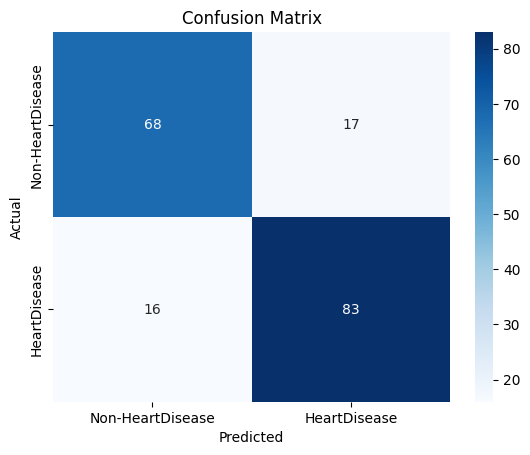

AUC para el modelo sin las columnas mencionadas y normalizado: 0.89


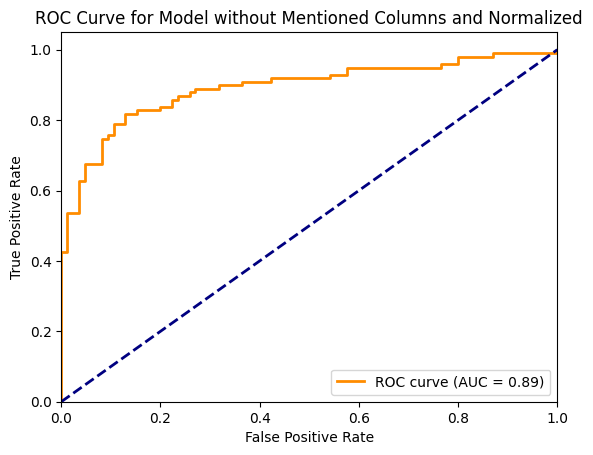

In [98]:
scaler_norm_no_features = MinMaxScaler()
X_heart_train_no_features_norm = scaler_norm_no_features.fit_transform(X_heart_train_no_features)
X_heart_test_no_features_norm = scaler_norm_no_features.transform(X_heart_test_no_features)

log_reg_no_features_norm = LogisticRegression(max_iter=1000)
log_reg_no_features_norm.fit(X_heart_train_no_features_norm, y_heart_train)
y_heart_pred_no_features_norm = log_reg_no_features_norm.predict(X_heart_test_no_features_norm)
print("\nDataset sin las columnas mencionadas y normalizado:")
print_metrics(y_heart_test, y_heart_pred_no_features_norm)
plot_confusion_matrix_Heart(y_heart_test, y_heart_pred_no_features_norm)

y_scores_no_features_norm = log_reg_no_features_norm.predict_proba(X_heart_test_no_features_norm)[:, 1]
fpr_no_features_norm, tpr_no_features_norm, thresholds_no_features_norm = roc_curve(y_heart_test, y_scores_no_features_norm)
roc_auc_no_features_norm = auc(fpr_no_features_norm, tpr_no_features_norm)
print(f"AUC para el modelo sin las columnas mencionadas y normalizado: {roc_auc_no_features_norm:.2f}")
plt.figure()
plt.plot(fpr_no_features_norm, tpr_no_features_norm, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_no_features_norm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model without Mentioned Columns and Normalized')
plt.legend(loc="lower right")
plt.show()

**Dataset sin columnas Estandarizado**<br>
Aquí se estandariza el *dataset* original sin las columnas, los resultados mejorar significativamente para todos y por el momento se convierte en la mejor opción.


Dataset sin las columnas mencionadas y estandarizado:
Accuracy: 0.85
Precision: 0.85
Recall: 0.87


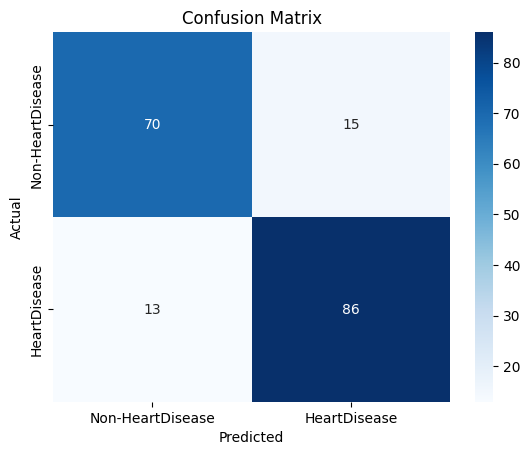

AUC para el modelo sin las columnas mencionadas y estandarizado: 0.89


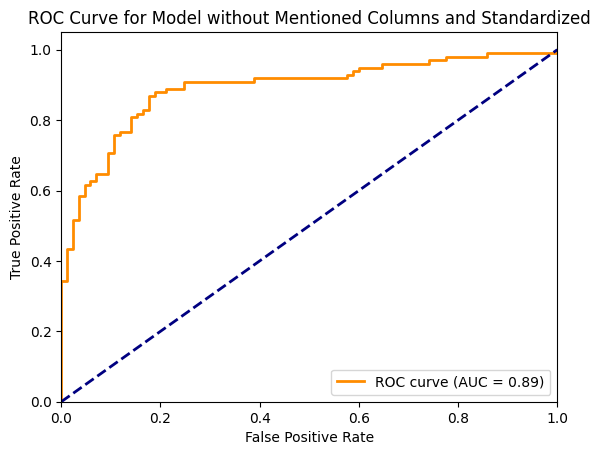

In [99]:
scaler_std_no_features = StandardScaler()
X_heart_train_no_features_std = scaler_std_no_features.fit_transform(X_heart_train_no_features)
X_heart_test_no_features_std = scaler_std_no_features.transform(X_heart_test_no_features)

log_reg_no_features_std = LogisticRegression(max_iter=1000)
log_reg_no_features_std.fit(X_heart_train_no_features_std, y_heart_train)
y_heart_pred_no_features_std = log_reg_no_features_std.predict(X_heart_test_no_features_std)
print("\nDataset sin las columnas mencionadas y estandarizado:")
print_metrics(y_heart_test, y_heart_pred_no_features_std)
plot_confusion_matrix_Heart(y_heart_test, y_heart_pred_no_features_std)

y_scores_no_features_std = log_reg_no_features_std.predict_proba(X_heart_test_no_features_std)[:, 1]
fpr_no_features_std, tpr_no_features_std, thresholds_no_features_std = roc_curve(y_heart_test, y_scores_no_features_std)
roc_auc_no_features_std = auc(fpr_no_features_std, tpr_no_features_std)
print(f"AUC para el modelo sin las columnas mencionadas y estandarizado: {roc_auc_no_features_std:.2f}")
plt.figure()
plt.plot(fpr_no_features_std, tpr_no_features_std, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_no_features_std)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model without Mentioned Columns and Standardized')
plt.legend(loc="lower right")
plt.show()


Continuando en la búsqueda de mejores métricas, se procede a mantener la eliminación de las columnas y además quitar los outliers. Primero se ejecutará el modelo con el *dataset* sin las columnas y sin *outliers*. Luego, se normalizará el *dataset* sin las columnas y sin *outliers* y se ejecuta el nuevo modelo normalizado. Por último, se estandariza el *dataset* sin las columnas y sin *outliers* y se vuelve a ejecutar esta vez estandarizado. Estas 3 pruebas distintas permitirán ver el comportamiento del modelo con diferentes modificaciones al *dataset* sin las columnas y sin *outliers*. La idea es obtener mejores resultados que con las pruebas anteriores.

**Dataset sin columnas y sin outliers**<br>
Aquí se realiza la prueba con el dataset sin las columnas y sin outliers, los resultados se mantiene similares a la última prueba.


Dataset sin las columnas y sin outliers:


Accuracy: 0.85
Precision: 0.87
Recall: 0.85


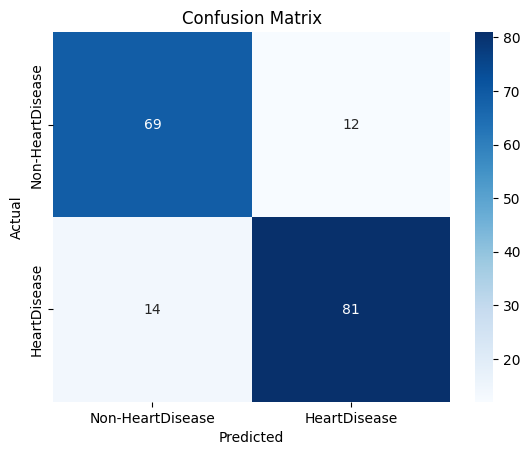

AUC para el modelo sin las columnas y sin outliers: 0.90


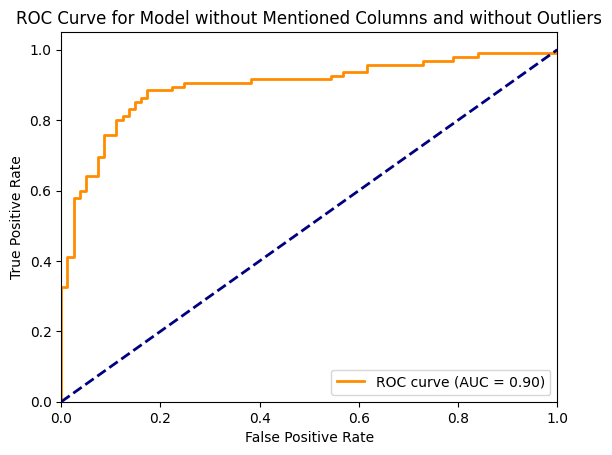

In [100]:
z_scores = np.abs(stats.zscore(X_heart_train_no_features))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
X_heart_train_no_features_no_outliers = X_heart_train_no_features[~outliers]
y_heart_train_no_outliers = y_heart_train[~outliers]

z_scores_test = np.abs(stats.zscore(X_heart_test_no_features))
outliers_test = (z_scores_test > threshold).any(axis=1)
X_heart_test_no_features_no_outliers = X_heart_test_no_features[~outliers_test]
y_heart_test_no_outliers = y_heart_test[~outliers_test]

log_reg_no_features_no_outliers = LogisticRegression(max_iter=1000)
log_reg_no_features_no_outliers.fit(X_heart_train_no_features_no_outliers, y_heart_train_no_outliers)
y_heart_pred_no_features_no_outliers = log_reg_no_features_no_outliers.predict(X_heart_test_no_features_no_outliers)
print("\nDataset sin las columnas y sin outliers:")
print_metrics(y_heart_test_no_outliers, y_heart_pred_no_features_no_outliers)
plot_confusion_matrix_Heart(y_heart_test_no_outliers, y_heart_pred_no_features_no_outliers)

y_scores_no_features_no_outliers = log_reg_no_features_no_outliers.predict_proba(X_heart_test_no_features_no_outliers)[:, 1]
fpr_no_features_no_outliers, tpr_no_features_no_outliers, thresholds_no_features_no_outliers = roc_curve(y_heart_test_no_outliers, y_scores_no_features_no_outliers)
roc_auc_no_features_no_outliers = auc(fpr_no_features_no_outliers, tpr_no_features_no_outliers)
print(f"AUC para el modelo sin las columnas y sin outliers: {roc_auc_no_features_no_outliers:.2f}")
plt.figure()
plt.plot(fpr_no_features_no_outliers, tpr_no_features_no_outliers, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_no_features_no_outliers)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model without Mentioned Columns and without Outliers')
plt.legend(loc="lower right")
plt.show()


**Dataset sin columnas y sin outliers Normalizado**<br>
Aquí se realiza la prueba con el dataset sin las columnas y sin outliers normalizado, los resultados empeoran en comparación a la última prueba.


Dataset sin las columnas y sin outliers normalizado:
Accuracy: 0.84
Precision: 0.86
Recall: 0.83


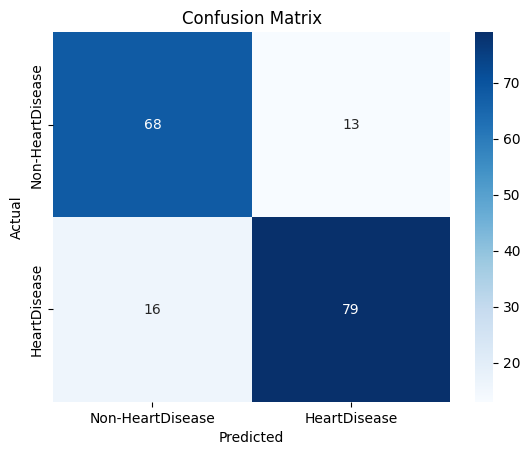

AUC para el modelo sin las columnas y sin outliers normalizado: 0.90


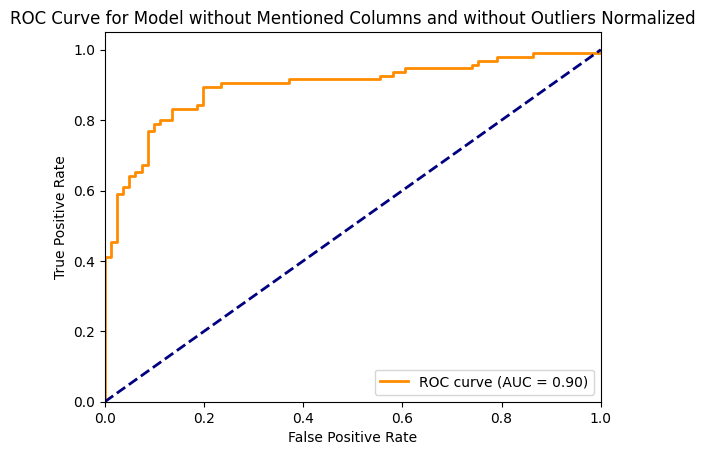

In [101]:
scaler_norm_no_features = MinMaxScaler()
X_heart_train_no_features_no_outliers_norm = scaler_norm_no_features.fit_transform(X_heart_train_no_features_no_outliers)
X_heart_test_no_features_no_outliers_norm = scaler_norm_no_features.transform(X_heart_test_no_features_no_outliers)

log_reg_no_features_no_outliers_norm = LogisticRegression(max_iter=1000)
log_reg_no_features_no_outliers_norm.fit(X_heart_train_no_features_no_outliers_norm, y_heart_train_no_outliers)
y_heart_pred_no_features_no_outliers_norm = log_reg_no_features_no_outliers_norm.predict(X_heart_test_no_features_no_outliers_norm)
print("\nDataset sin las columnas y sin outliers normalizado:")
print_metrics(y_heart_test_no_outliers, y_heart_pred_no_features_no_outliers_norm)
plot_confusion_matrix_Heart(y_heart_test_no_outliers, y_heart_pred_no_features_no_outliers_norm)

y_scores_no_features_no_outliers_norm = log_reg_no_features_no_outliers_norm.predict_proba(X_heart_test_no_features_no_outliers_norm)[:, 1]
fpr_no_features_no_outliers_norm, tpr_no_features_no_outliers_norm, thresholds_no_features_no_outliers_norm = roc_curve(y_heart_test_no_outliers, y_scores_no_features_no_outliers_norm)
roc_auc_no_features_no_outliers_norm = auc(fpr_no_features_no_outliers_norm, tpr_no_features_no_outliers_norm)
print(f"AUC para el modelo sin las columnas y sin outliers normalizado: {roc_auc_no_features_no_outliers_norm:.2f}")
plt.figure()
plt.plot(fpr_no_features_no_outliers_norm, tpr_no_features_no_outliers_norm, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_no_features_no_outliers_norm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model without Mentioned Columns and without Outliers Normalized')
plt.legend(loc="lower right")
plt.show()


**Dataset sin columnas y sin outliers Estandarizado**<br>
Aquí se realiza la prueba con el dataset sin las columnas y sin outliers estandarizado, los resultados mejoran y se obtiene el nuevo mejor modelo.


Dataset sin las columnas y sin outliers estandarizado:
Accuracy: 0.86
Precision: 0.87
Recall: 0.86


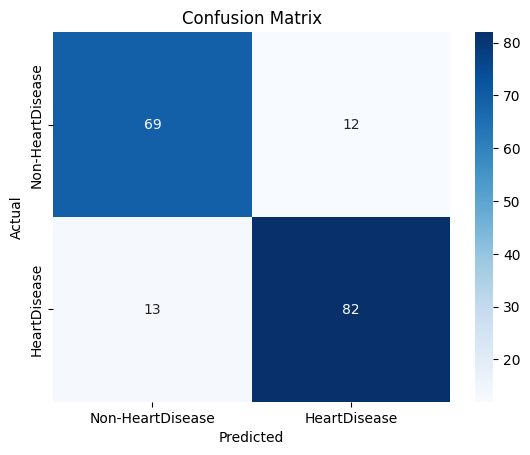

AUC para el modelo sin las columnas y sin outliers estandarizado: 0.90


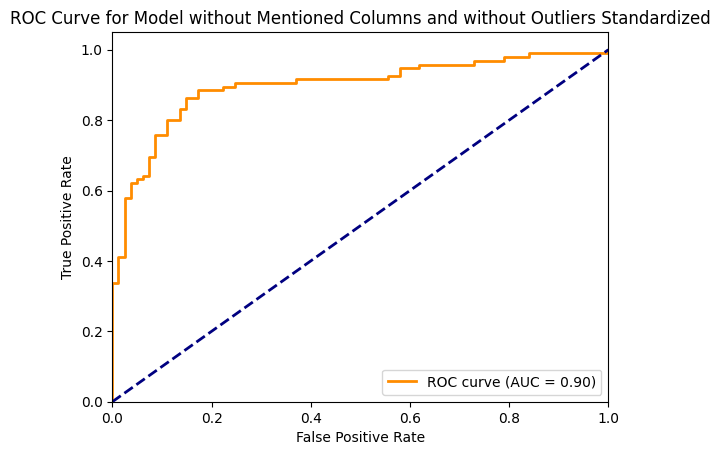

In [102]:
scaler_std_no_features = StandardScaler()
X_heart_train_no_features_no_outliers_std = scaler_std_no_features.fit_transform(X_heart_train_no_features_no_outliers)
X_heart_test_no_features_no_outliers_std = scaler_std_no_features.transform(X_heart_test_no_features_no_outliers)

log_reg_no_features_no_outliers_std = LogisticRegression(max_iter=1000)
log_reg_no_features_no_outliers_std.fit(X_heart_train_no_features_no_outliers_std, y_heart_train_no_outliers)
y_heart_pred_no_features_no_outliers_std = log_reg_no_features_no_outliers_std.predict(X_heart_test_no_features_no_outliers_std)
print("\nDataset sin las columnas y sin outliers estandarizado:")
print_metrics(y_heart_test_no_outliers, y_heart_pred_no_features_no_outliers_std)
plot_confusion_matrix_Heart(y_heart_test_no_outliers, y_heart_pred_no_features_no_outliers_std)

y_scores_no_features_no_outliers_std = log_reg_no_features_no_outliers_std.predict_proba(X_heart_test_no_features_no_outliers_std)[:, 1]
fpr_no_features_no_outliers_std, tpr_no_features_no_outliers_std, thresholds_no_features_no_outliers_std = roc_curve(y_heart_test_no_outliers, y_scores_no_features_no_outliers_std)
roc_auc_no_features_no_outliers_std = auc(fpr_no_features_no_outliers_std, tpr_no_features_no_outliers_std)
print(f"AUC para el modelo sin las columnas y sin outliers estandarizado: {roc_auc_no_features_no_outliers_std:.2f}")
plt.figure()
plt.plot(fpr_no_features_no_outliers_std, tpr_no_features_no_outliers_std, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_no_features_no_outliers_std)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model without Mentioned Columns and without Outliers Standardized')
plt.legend(loc="lower right")
plt.show()

Debido a que el dataset está balanceado no se realizará la prueba de sobremuestreo realizada en las pruebas del dataset anterior.<br>

Para elegir el mejor modelo, se ha decidido utilizar la métrica AUC calculada en todas las pruebas, al igual que en el *dataset* anterior. Estos resultados se ordenaron de mayor a menor para elegir el menor. Para esto no se redondeó con el fin de obtener el mejor con todos los decimales.

In [103]:
pruebas_auc = [
    ("Original", roc_auc_orig),
    ("Original normalizado", roc_auc_norm),
    ("Original estandarizado", roc_auc_std),
    ("Sin las columnas mencionadas", roc_auc_no_features),
    ("Sin las columnas mencionadas y normalizado", roc_auc_no_features_norm),
    ("Sin las columnas mencionadas y estandarizado", roc_auc_no_features_std),
    ("Sin las columnas y sin outliers", roc_auc_no_features_no_outliers),
    ("Sin las columnas y sin outliers normalizado", roc_auc_no_features_no_outliers_norm),
    ("Sin las columnas y sin outliers estandarizado", roc_auc_no_features_no_outliers_std)
]

pruebas_auc.sort(key=lambda x: x[1], reverse=True)

for i, prueba in enumerate(pruebas_auc, start=1):
    print(f"{i}. {prueba[0]}: {prueba[1]}")

1. Original normalizado: 0.9286987522281639
2. Original estandarizado: 0.9240641711229947
3. Original: 0.9234699940582294
4. Sin las columnas y sin outliers estandarizado: 0.896816114359974
5. Sin las columnas y sin outliers: 0.8962962962962964
6. Sin las columnas y sin outliers normalizado: 0.8951267056530214
7. Sin las columnas mencionadas y normalizado: 0.8923351158645276
8. Sin las columnas mencionadas y estandarizado: 0.8913844325609032
9. Sin las columnas mencionadas: 0.8906714200831849


Para el modelo de regresión lineal, el mejor modelo fue el el original normalizado debido a que obtuvo el mejor resultado con AUC. La decisión final es utilizar el dataset sin columnas. <br>

Sin embargo, continuando en la búsqueda de mejores métricas para el modelo de regresión logística, se procede a buscar los mejores hiperparámetros para el modelo con el *dataset* ya elegido por el equipo de trabajo. Primero se probó con *scoring='F1-Score'*.






**Dataset elegido con mejores hiperparámetros F1 Score**<br>
Aquí se realiza la prueba con el dataset elegido para buscar los mejores hiperparámetros, los resultados son similares al dataset elegido con la diferencia de que baja un poco el recall, mejora el presicion y el accuracy se mantiene. Del mismo modo, se calcular la métrica AUC con el fin de saber cuál de los dos hiperparámetros buscados es el mejor para el caso en cuestión.


Resultados del modelo sin las columnas con los mejores hiperparámetros (F1-score):
Accuracy: 0.84
Precision: 0.84
Recall: 0.86
F1-score: 0.85


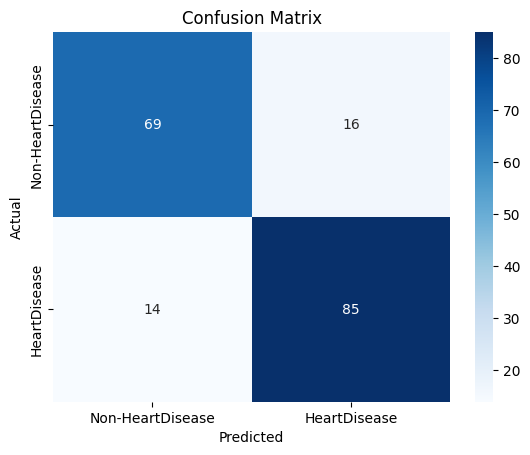

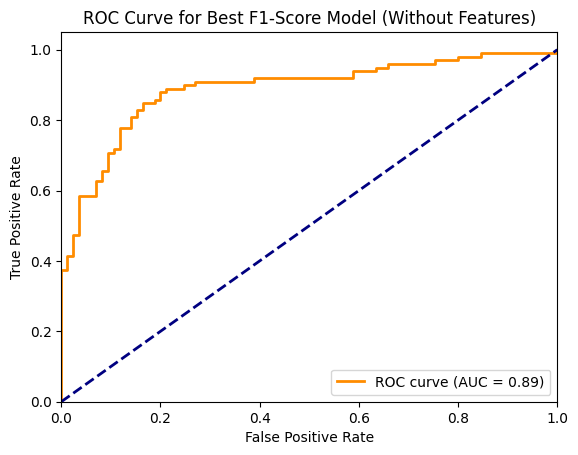

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

param_grid_extended = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False]
}

import warnings
warnings.filterwarnings("ignore")

grid_search_f1_no_features = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_no_features,
    cv=5,
    scoring='f1'
)
grid_search_f1_no_features.fit(X_heart_train_no_features, y_heart_train)

best_params_f1_no_features = grid_search_f1_no_features.best_params_
best_model_f1_no_features = grid_search_f1_no_features.best_estimator_

y_heart_pred_best_f1_no_features = best_model_f1_no_features.predict(X_heart_test_no_features)
print("\nResultados del modelo sin las columnas con los mejores hiperparámetros (F1-score):")
acc_score_f1 = accuracy_score(y_heart_test, y_heart_pred_best_f1_no_features)
prec_score_f1 = precision_score(y_heart_test, y_heart_pred_best_f1_no_features)
recall_score_f1 = recall_score(y_heart_test, y_heart_pred_best_f1_no_features)
f1_score_f1 = f1_score(y_heart_test, y_heart_pred_best_f1_no_features)
print(f"Accuracy: {acc_score_f1:.2f}")
print(f"Precision: {prec_score_f1:.2f}")
print(f"Recall: {recall_score_f1:.2f}")
print(f"F1-score: {f1_score_f1:.2f}")

plot_confusion_matrix_Heart(y_heart_test, y_heart_pred_best_f1_no_features)

y_scores_f1 = best_model_f1_no_features.predict_proba(X_heart_test_no_features)[:, 1]
fpr_f1, tpr_f1, thresholds_f1 = roc_curve(y_heart_test, y_scores_f1)
roc_auc_f1 = auc(fpr_f1, tpr_f1)

plt.figure()
plt.plot(fpr_f1, tpr_f1, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_f1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best F1-Score Model (Without Features)')
plt.legend(loc="lower right")
plt.show()

Continuando en la búsqueda de los mejores hiperparámetros para el modelo con el dataset ya elegido por el equipo de trabajo, ahora se probará con scoring='accuracy'.

**Dataset elegido con mejores hiperparámetros Accuracy** <br>
Aquí se realiza la prueba con el dataset elegido para buscar los mejores hiperparámetros con F1 Score, los resultados se mantienen igual al anterior.


Resultados del modelo sin las columnas con los mejores hiperparámetros (Accuracy):
Accuracy: 0.82
Precision: 0.86
Recall: 0.80
F1-score: 0.83


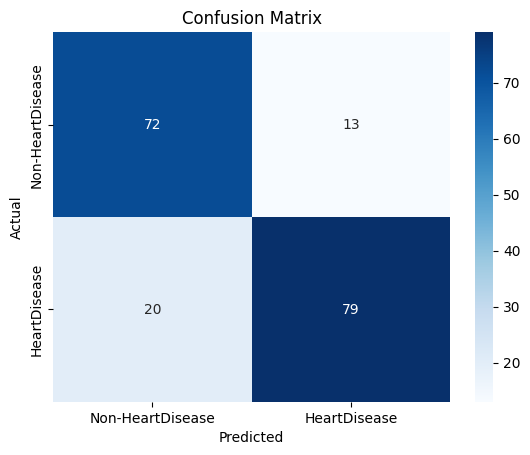

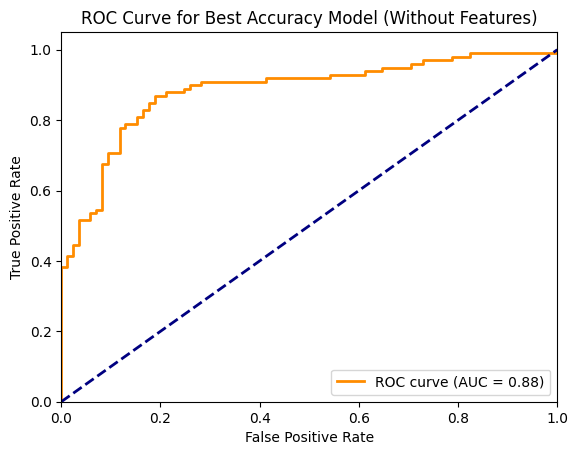

In [117]:
import warnings
warnings.filterwarnings("ignore")

# Búsqueda de hiperparámetros para el modelo sin las columnas (Accuracy)
param_grid_no_features = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False]
}

grid_search_acc_no_features = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_no_features,
    cv=5,
    scoring='accuracy'
)
grid_search_acc_no_features.fit(X_heart_train_no_features, y_heart_train)

best_params_acc_no_features = grid_search_acc_no_features.best_params_
best_model_acc_no_features = grid_search_acc_no_features.best_estimator_

y_heart_pred_best_acc_no_features = best_model_acc_no_features.predict(X_heart_test_no_features)
print("\nResultados del modelo sin las columnas con los mejores hiperparámetros (Accuracy):")
acc_score_acc = accuracy_score(y_heart_test, y_heart_pred_best_acc_no_features)
prec_score_acc = precision_score(y_heart_test, y_heart_pred_best_acc_no_features)
recall_score_acc = recall_score(y_heart_test, y_heart_pred_best_acc_no_features)
f1_score_acc = f1_score(y_heart_test, y_heart_pred_best_acc_no_features)
print(f"Accuracy: {acc_score_acc:.2f}")
print(f"Precision: {prec_score_acc:.2f}")
print(f"Recall: {recall_score_acc:.2f}")
print(f"F1-score: {f1_score_acc:.2f}")

plot_confusion_matrix_Heart(y_heart_test, y_heart_pred_best_acc_no_features)

y_scores_acc = best_model_acc_no_features.predict_proba(X_heart_test_no_features)[:, 1]
fpr_acc, tpr_acc, thresholds_acc = roc_curve(y_heart_test, y_scores_acc)
roc_auc_acc = auc(fpr_acc, tpr_acc)

plt.figure()
plt.plot(fpr_acc, tpr_acc, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_acc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Accuracy Model (Without Features)')
plt.legend(loc="lower right")
plt.show()

Cómo se puede observar, con el hiperparametro de F1-Score se obtiene un AUC de (0.89), mayor que el de Accuracy.

Por este motivo, el modelo elegido para el modelo de regresión logística en el dataset Heart Failure Prediction Dataset es el que se obtuvo con el hiperparámetro F1.